In [1]:
# импортировать библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# загрузить данные по недвижимости, вывести на экран инфо
# проверим типы данных и названия столбиков с которыми будем работать
df=pd.read_csv('kc-house-data (1).csv',parse_dates=['date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

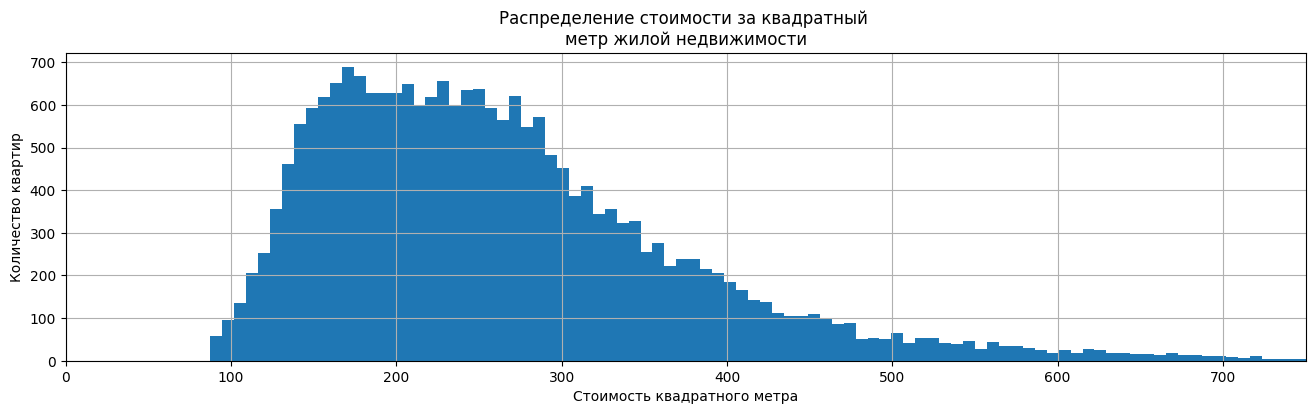

In [2]:
# расчитаем стоимость за один кв. метр жилой площади.
avg  = df['price'] / df['sqft_living']

# сделаем график
fig,ax=plt.subplots(figsize=(16,4))
ax.hist(avg.sort_values(),100)
ax.set(xlim=(0,750),title='Распределение стоимости за квадратный \nметр жилой недвижимости')
ax.set_xlabel('Стоимость квадратного метра')
ax.set_ylabel('Количество квартир')
ax.grid()

Text(0.5, 0, 'квадратные метры')

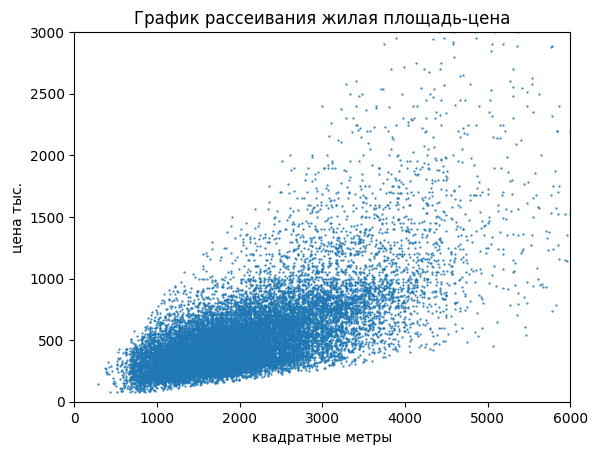

In [3]:
# создадим график рассеивания x=цена за квадратный метр, y=жилая площадь
import matplotlib.ticker as tk
y=df['price'].apply(lambda x: int(x/1000))
fig,ax=plt.subplots()
ax.scatter(x=df['sqft_living'] ,y=y,s=0.3)
ax.set(ylim=(0,3000), xlim=(0,6000))
ax.set_title('График рассеивания жилая площадь-цена')
ax.set_ylabel('цена тыс.')
ax.set_xlabel('квадратные метры')

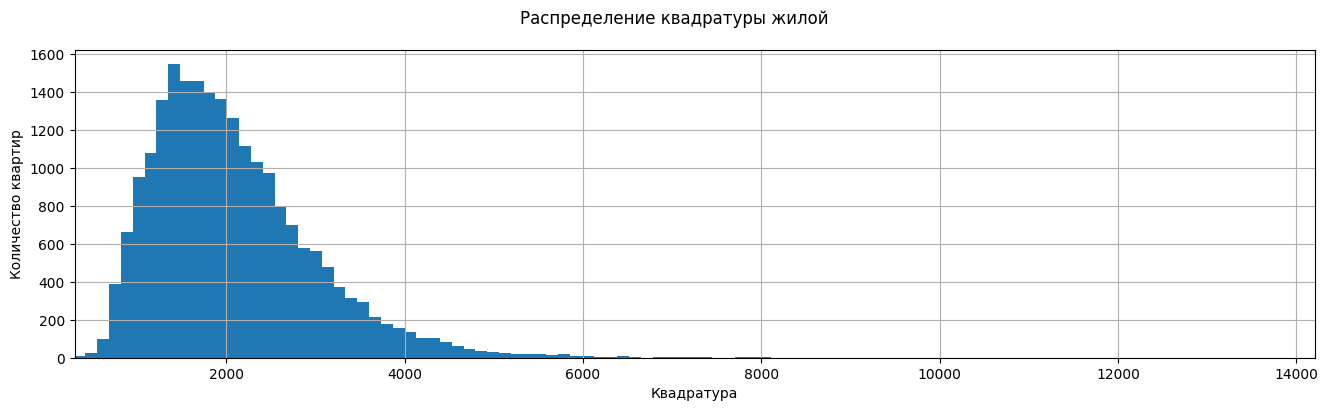

In [4]:
# распределение квадратуры жилой
# сделаем график
fig,ax=plt.subplots(figsize=(16,4))
ax.hist(df['sqft_living'],100)
ax.set_xlabel('Квадратура')
ax.set_ylabel('Количество квартир')
ax.set_xlim(300)
fig.suptitle('Распределение квадратуры жилой')
ax.grid()

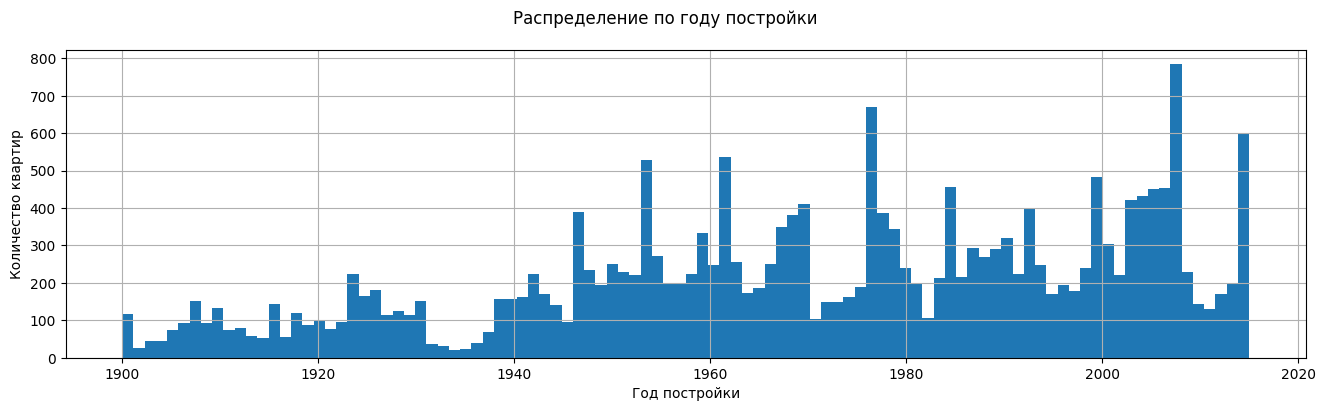

In [5]:
# изучим год постройки
year=df['yr_built']
fig,ax=plt.subplots(figsize=(16,4))
ax.hist(year,100)
ax.set_xlabel('Год постройки')
ax.set_ylabel('Количество квартир')
# ax.set_xlim(300)
fig.suptitle('Распределение по году постройки')
ax.grid()

Text(0.5, 1.0, 'Распределение домов от наличия вида на набережную')

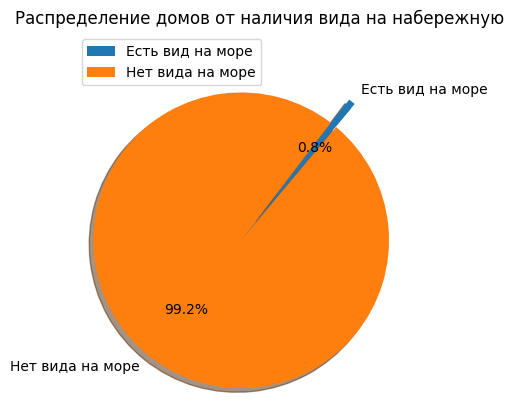

In [6]:
# изучим распределение домов от наличия вида на набережную
explode = (0, 0.2)
yes=df[df['waterfront']==1]['waterfront'].count()
no=df[df['waterfront']==0]['waterfront'].count()
fig,ax=plt.subplots()
ax.pie([yes,no],autopct='%1.1f%%',labels=["Есть вид на море", "Нет вида на море"],explode=explode,shadow=True,startangle=50)
ax.legend()
ax.set_title('Распределение домов от наличия вида на набережную')

Text(0.5, 1.0, 'Средняя цена за квадратный метр\n есть вид на море/нет вида на море')

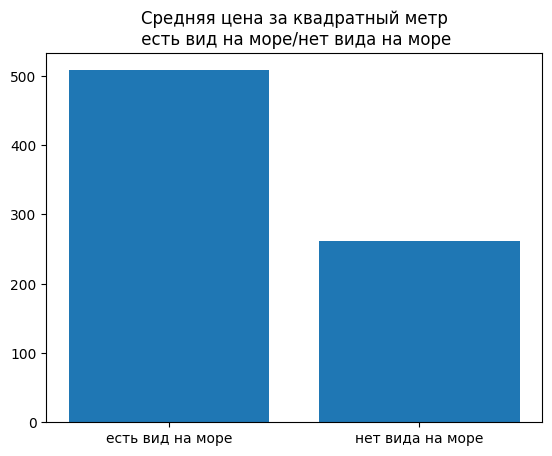

In [7]:
# построим график и сравним цены за квадратный метр с видом и без вида на море
df['m']=df['price'] / df['sqft_living']
yes=df[df['waterfront']==1]
yes=yes['m'].mean()
no=df[df['waterfront']==0]
no=no['m'].mean()
x=['есть вид на море', 'нет вида на море']
y=[yes,no]
fig,ax=plt.subplots()
ax.bar(x,y)
ax.set_title('Средняя цена за квадратный метр\n есть вид на море/нет вида на море')

Text(0, 0.5, 'количество домов')

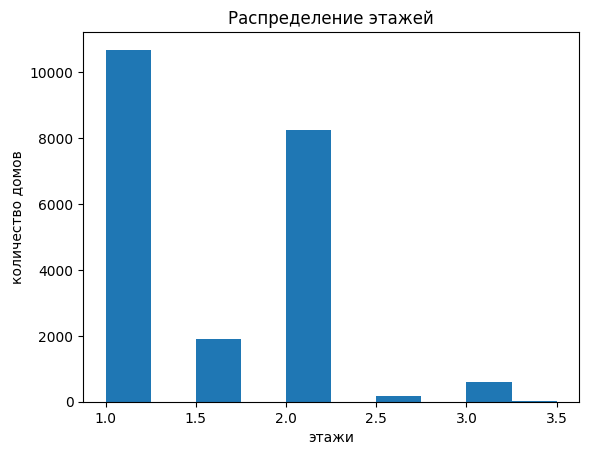

In [8]:
# изучить распределение этажей
flors=df['floors'].sort_values()
fig,ax=plt.subplots()
ax.hist(flors)
ax.set_title('Распределение этажей')
ax.set_xlabel('этажи')
ax.set_ylabel('количество домов')



Text(0, 0.5, 'количество домов')

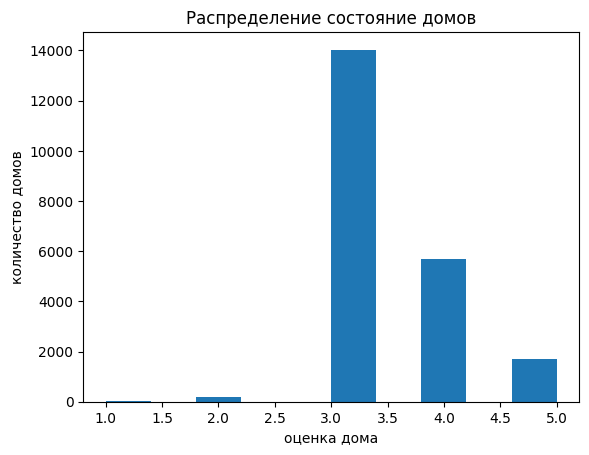

In [9]:
# изучить распределение состояния домов
condition=df['condition'].sort_values()
fig,ax=plt.subplots()
ax.hist(condition)
ax.set_title('Распределение состояние домов')
ax.set_xlabel('оценка дома')
ax.set_ylabel('количество домов')



Итог. Таким образом был проведен анализ который показал как происходит распределение стоимости жилой недвжимости , основная масса домов имеют стоимость от 100 до 300 за квадратный метр , после чего с ростом цены количество домов неуклонно снижается. Для того чтобы иметь возможность рассмотреть возможность покупки с максимальным выбором необходимо иметь сумму около 200. Единица измерения в таблице не приводится. 
График рассеивания жилая площадь цена - показывает , что с увеличением жилой площади от 3000кв.м. график рассеивания становится менее плотным и более раскиданным, что означает что с увеличеним площади уменьшается количество домов на продажу, т.е. их количество меньше, а цена за квадратный метр варьируется в широком диапазоне. Основной центр плотности находится от 1000 до 2000кв.м. где цена имеет наибольшие рыночные характеристики сформированные высоким спросом и предложением. 
На третьей диаграме распределения квадратуры жилой мы видим что максимальное количество домов имеют площадь ближе к 2000кв. м. из чего я делаю вывод что набор данных не из россии.
На диаграме распределения домов по году постройки мы видим что основная масса квартир имеет возраст от 1940г. и далее.
Диаграмма распределения домов от вида на набережную показывает что количество таких домов очень незначительно и составляет 0,8% от основной массы, а следующая диаграмма показывает что стоимость жилой недвижимости в среднем выше в два раза.
На следующей диаграмме мы видим что основная масса домов имеет 1 и 2 этажа, и я могу утверждать что набор данных точно не из китая.
Распределение состояния домов показывает что основная масса имеет 3. 